In [1]:
# This script builds and trains a Multi-Layer Perceptron (MLP) regressor using Keras
# to predict median house values from the California Housing dataset.
# The model uses a feedforward neural network architecture with one or more hidden layers.
# The dataset features include median income, house age, average rooms, location data, etc.
# The target is a continuous value (house price), so the output layer uses a single neuron with linear activation.

from sklearn.datasets import fetch_california_housing  # Load the California housing dataset
from sklearn.model_selection import train_test_split    # Tool to split data into train/validation/test sets
from sklearn.preprocessing import StandardScaler        # Tool to scale features to standard normal distribution

# Load the dataset (features and target)
housing = fetch_california_housing()

# Split data into training and test sets
X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target)

# Further split training data into training and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full)

# Standardize the features: zero mean and unit variance
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)      # Fit on training data and transform it
X_valid = scaler.transform(X_valid)          # Use the same transformation on validation data
X_test = scaler.transform(X_test)            # Use the same transformation on test data

d:\hands_on_machine_learning\C10 - Artificial Neural Networks with Keras\env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 2.3257 - val_loss: 0.4956
Epoch 2/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5120 - val_loss: 0.4465
Epoch 3/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5062 - val_loss: 0.4324
Epoch 4/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4957 - val_loss: 0.4206
Epoch 5/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4256 - val_loss: 0.4122
Epoch 6/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4086 - val_loss: 0.4061
Epoch 7/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4165 - val_loss: 0.4023
Epoch 8/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3914 - val_loss: 0.3949
Epoch 9/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3849 - val_loss: 0.3897
Epoch 10/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3790 - val_loss: 0.3868
Epoch 11/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3787 - val_loss: 0.3865
Epoch 12/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

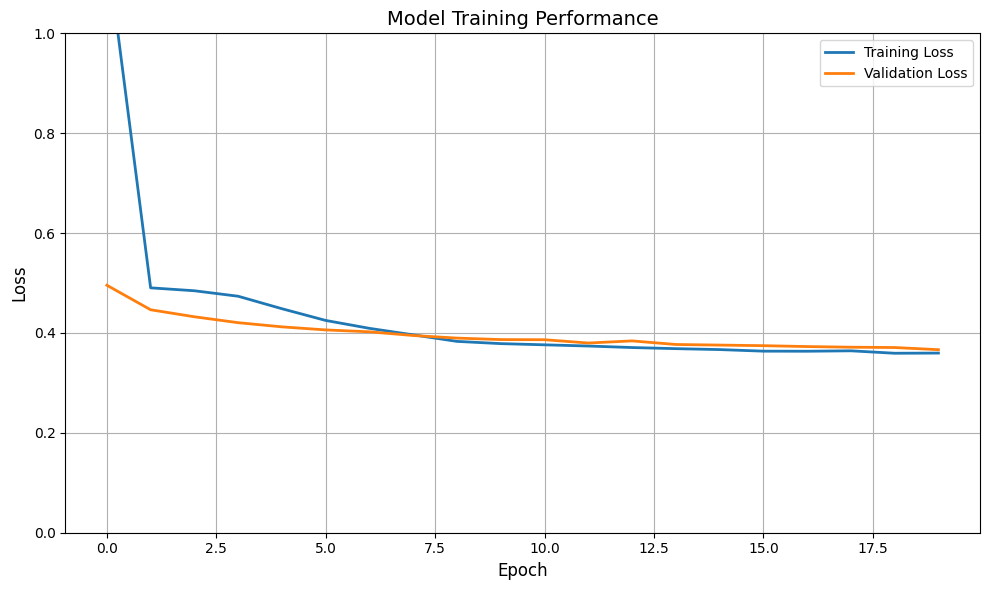

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step

The mean squared error is: 0.4837

The prediction of these 3 instances is:
[[1.0475624]
 [2.5428886]
 [1.656935 ]]


In [2]:
from tensorflow import keras
import pandas as pd
import matplotlib.pyplot as plt

# Define a simple feedforward neural network using Keras Sequential API
model = keras.models.Sequential([
    # First hidden layer with 30 neurons and ReLU activation
    keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),
    # Output layer with 1 neuron for regression (no activation = linear)
    keras.layers.Dense(1)
])

# Define a function that compiles, trains, and evaluates a regression model
def model_compile_eval(model, train_feat, train_labels, test_feat, test_labels, val_feat, val_labels):

    # Create a Stochastic Gradient Descent optimizer with a learning rate of 0.01
    # and gradient clipping by norm to prevent exploding gradients during training
    optimizer = keras.optimizers.SGD(learning_rate=0.01, clipnorm=1.0)

    # Compile the model using Mean Squared Error (MSE) as the loss function
    # and Stochastic Gradient Descent (SGD) as the optimizer
    model.compile(loss="mean_squared_error", optimizer=optimizer)

    # Train the model for 20 epochs on the training data
    # Validate its performance on the validation set after each epoch
    history = model.fit(train_feat, train_labels, epochs=20, validation_data=(val_feat, val_labels))

    # Evaluate the trained model on the test data to get the final MSE
    mse_test = model.evaluate(test_feat, test_labels)

    # Convert the training history to a DataFrame
    history_df = pd.DataFrame(history.history)

    # Create a figure and plot
    plt.figure(figsize=(10, 6))
    plt.plot(history_df["loss"], label="Training Loss", linewidth=2)
    if "val_loss" in history_df:
        plt.plot(history_df["val_loss"], label="Validation Loss", linewidth=2)

    # Add titles and labels
    plt.title("Model Training Performance", fontsize=14)
    plt.xlabel("Epoch", fontsize=12)
    plt.ylabel("Loss", fontsize=12)

    # Set y-axis limits if appropriate (useful for accuracy metrics)
    plt.ylim(0, 1)

    # Add a grid, legend, and display the plot
    plt.grid(True)
    plt.legend(loc="best")
    plt.tight_layout()
    plt.show()

    # Return the training history and the test set MSE
    return history, mse_test

# Call the function to compile, train, and evaluate the model
history, mse_test = model_compile_eval(model, X_train, y_train, X_test, y_test, X_valid, y_valid)

# Select the first 3 samples from the test set to simulate new/unseen input data
X_new = X_test[:3]

# Predict the target (house prices) for the selected instances
y_pred = model.predict(X_new)

# Print results
print(f"\nThe mean squared error is: {mse_test:.4}\n")
print(f"The prediction of these 3 instances is:\n{y_pred}")

Epoch 1/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 2.2433 - val_loss: 0.5140
Epoch 2/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.5026 - val_loss: 0.4561
Epoch 3/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4762 - val_loss: 0.4322
Epoch 4/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4480 - val_loss: 0.4118
Epoch 5/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4208 - val_loss: 0.4072
Epoch 6/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3905 - val_loss: 0.3929
Epoch 7/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3823 - val_loss: 0.3925
Epoch 8/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3753 - val_loss: 0.3813
Epoch 9/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3748 - val_loss: 0.3764
Epoch 10/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3562 - val_loss: 0.3833
Epoch 11/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3634 - val_loss: 0.3798
Epoch 12/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

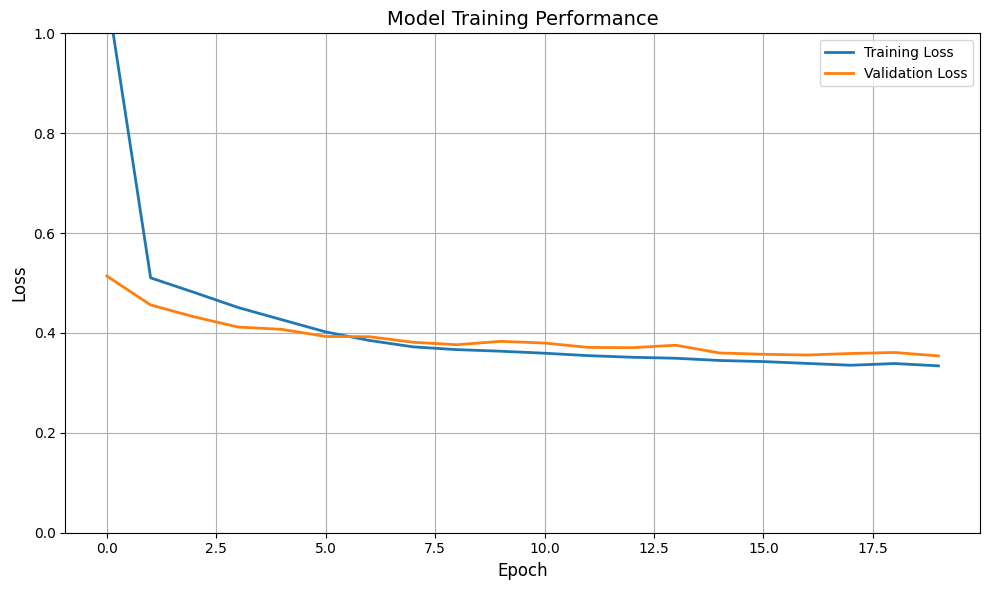

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step

The mean squared error is: 0.4035

The prediction of these 3 instances is:
[[1.2194933]
 [2.3580215]
 [2.0909023]]


In [3]:
# Let's build a nonsequential neural network using the functional API

# Define the input layer with the same number of features as the training data
input_ = keras.layers.Input(shape=X_train.shape[1:])

# First hidden layer with 30 neurons and ReLU activation
hidden1 = keras.layers.Dense(30, activation="relu")(input_)

# Second hidden layer with 30 neurons and ReLU, taking output from hidden1
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)

# Concatenate the original input and the output of the second hidden layer
# This allows the model to use both raw input and processed features
concat = keras.layers.Concatenate()([input_, hidden2])

# Output layer with 1 neuron for regression (predicting a single continuous value)
output = keras.layers.Dense(1)(concat)

# Build the full model by specifying the input and output
model_nonseq = keras.Model(inputs=input_, outputs=output)

# Call the function to compile, train, and evaluate the model
history_nonseq, mse_test_nonseq = model_compile_eval(model_nonseq, X_train, y_train, X_test, y_test, X_valid, y_valid)

# Predict the target (house prices) for the selected instances
y_pred_nonseq = model_nonseq.predict(X_new)

# Print results
print(f"\nThe mean squared error is: {mse_test_nonseq:.4}\n")
print(f"The prediction of these 3 instances is:\n{y_pred_nonseq}")

Epoch 1/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.7461 - val_loss: 0.5939
Epoch 2/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.6129 - val_loss: 0.4991
Epoch 3/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5048 - val_loss: 0.4678
Epoch 4/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.4803 - val_loss: 0.4547
Epoch 5/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.4345 - val_loss: 0.4350
Epoch 6/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4287 - val_loss: 0.4236
Epoch 7/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4170 - val_loss: 0.4115
Epoch 8/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4108 - val_loss: 0.4071
Epoch 9/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3997 - val_loss: 0.3982
Epoch 10/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3726 - val_loss: 0.3970
Epoch 11/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3783 - val_loss: 0.3909
Epoch 12/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

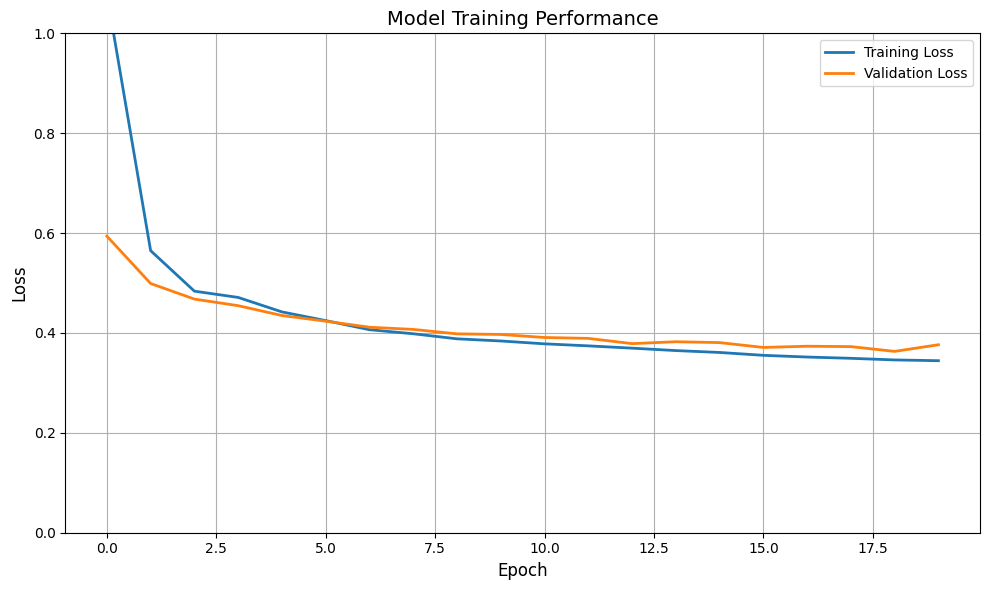

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step

The mean squared error is: 0.3628

The prediction of these 3 instances is:
[[1.1502539]
 [3.020251 ]
 [2.1330671]]


In [4]:
# Let's now take a new approach and send a subset of the features through the wide path
# and a different subset through the deep path

# Define the "wide" input layer with 5 features
input_A = keras.layers.Input(shape=[5], name="wide_input")

# Define the "deep" input layer with 6 features
input_B = keras.layers.Input(shape=[6], name="deep_input")

# First hidden layer for the deep path with 30 neurons and ReLU activation
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)

# Second hidden layer in the deep path, also with 30 neurons and ReLU
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)

# Concatenate the wide input and the output of the deep path
# This combines both raw features (wide) and learned features (deep)
concat = keras.layers.concatenate([input_A, hidden2])

# Final output layer with 1 neuron (for regression or binary classification)
output = keras.layers.Dense(1, name="output")(concat)

# Define the full model with two inputs and one output
model_wide_deep = keras.Model(inputs=[input_A, input_B], outputs=[output])

# Split the training set into two parts:
# - X_train_A: first 5 features (used as "wide" input)
# - X_train_B: from feature 2 onward (used as "deep" input, overlapping features with A)
X_train_A, X_train_B = X_train[:, :5], X_train[:, 2:]
train_feat = (X_train_A, X_train_B)  # Combine both parts into a tuple for model input

# Do the same split for the validation set
X_valid_A, X_valid_B = X_valid[:, :5], X_valid[:, 2:]
val_feat = (X_valid_A, X_valid_B)  # Tuple of wide and deep inputs for validation

# Same split for the test set
X_test_A, X_test_B = X_test[:, :5], X_test[:, 2:]
test_feat = (X_test_A, X_test_B)  # Tuple for model evaluation on test data

# Prepare new data (e.g., samples to predict) with the same structure
X_new_A, X_new_B = X_new[:, :5], X_new[:, 2:]
new_feat = (X_new_A, X_new_B)  # Tuple for making predictions

# Call the function to compile, train, and evaluate the model
history_wide_deep, mse_test_wide_deep = model_compile_eval(model_wide_deep, train_feat, y_train, test_feat, y_test, val_feat, y_valid)

# Predict the target (house prices) for the selected instances
y_pred_wide_deep = model_wide_deep.predict(new_feat)

# Print results
print(f"\nThe mean squared error is: {mse_test_wide_deep:.4}\n")
print(f"The prediction of these 3 instances is:\n{y_pred_wide_deep}")


In [5]:
# Build a Multi-Input model with an auxiliary output to help regularize training

# Define two separate input layers: one for "wide" input features (5 features), and one for "deep" input (6 features)
input_A = keras.layers.Input(shape=[5], name="wide_input")
input_B = keras.layers.Input(shape=[6], name="deep_input")

# Create the "deep" pathway: two hidden layers with 30 neurons each and ReLU activation
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)

# Concatenate the wide input directly with the deep path (after 2 hidden layers)
concat = keras.layers.concatenate([input_A, hidden2])

# Define the main output that uses both raw and processed features
main_output = keras.layers.Dense(1, name="main_output")(concat)

# Define an auxiliary output from the second hidden layer to help guide the learning process
aux_output = keras.layers.Dense(1, name="aux_output")(hidden2)

# Create the model by specifying the two inputs and two outputs
model_auxout = keras.Model(inputs=[input_A, input_B], outputs=[main_output, aux_output])

# Compile the model with two loss functions (one per output)
# Assign a higher weight to the main output, since it is more important for the task
model_auxout.compile(loss=["mse", "mse"], loss_weights=[0.9, 0.1], optimizer="sgd")

# Train the model on both outputs — both should learn to predict the same target (house value)
# Use tuples for both inputs and outputs, as the model has multiple of each
history_auxout = model_auxout.fit(
    [X_train_A, X_train_B],        # input features for both branches
    [y_train, y_train],            # same labels for both outputs
    epochs=20,
    validation_data=([X_valid_A, X_valid_B], [y_valid, y_valid])
)

# Evaluate the model: returns total loss and individual losses for each output
total_loss, main_loss, aux_loss = model_auxout.evaluate(
    [X_test_A, X_test_B],
    [y_test, y_test]
)

# Make predictions on new data (3 instances); returns predictions for both outputs
y_pred_main, y_pred_aux = model_auxout.predict([X_new_A, X_new_B])

Epoch 1/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - aux_output_loss: 2.9210 - loss: 1.5523 - main_output_loss: 1.4003 - val_aux_output_loss: 1.1487 - val_loss: 0.5700 - val_main_output_loss: 0.5056
Epoch 2/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - aux_output_loss: 1.0324 - loss: 0.5614 - main_output_loss: 0.5091 - val_aux_output_loss: 0.9215 - val_loss: 0.4925 - val_main_output_loss: 0.4447
Epoch 3/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - aux_output_loss: 0.8793 - loss: 0.5167 - main_output_loss: 0.4764 - val_aux_output_loss: 0.7996 - val_loss: 0.4663 - val_main_output_loss: 0.4291
Epoch 4/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - aux_output_loss: 0.7588 - loss: 0.4644 - main_output_loss: 0.4317 - val_aux_output_loss: 0.7075 - val_loss: 0.4711 - val_main_output_loss: 0.4447
Epoch 5/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - aux_output_loss: 0.7069 - loss: 0.4661 - main_output_loss: 0.4393 - val_aux_output_loss: 0.6548 - val_loss: 0.4399 - val_main_output_loss: 0.4159


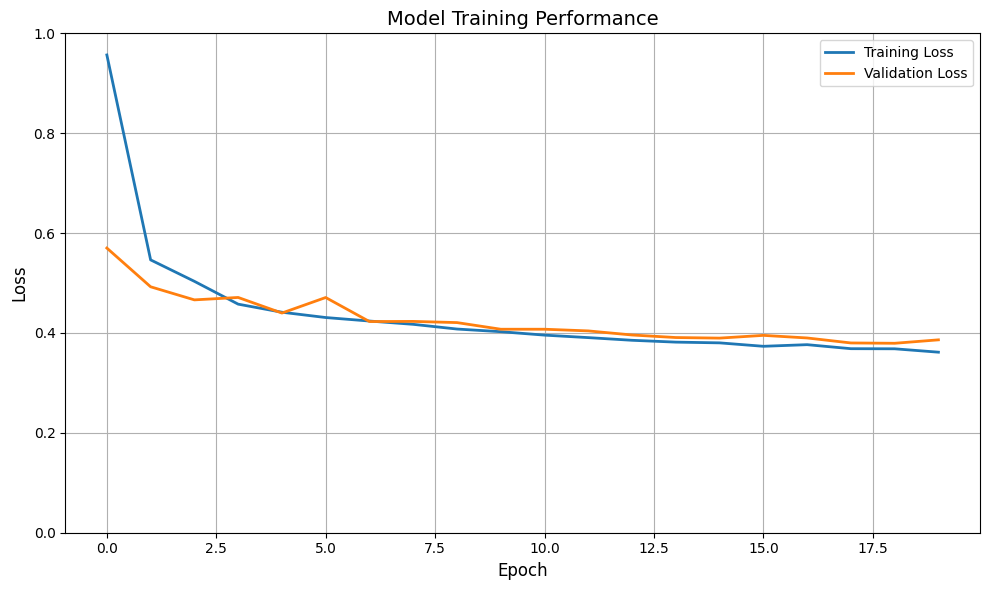

In [6]:
# Convert the training history to a DataFrame
history_df = pd.DataFrame(history_auxout.history)

    # Create a figure and plot
plt.figure(figsize=(10, 6))
plt.plot(history_df["loss"], label="Training Loss", linewidth=2)
if "val_loss" in history_df:
    plt.plot(history_df["val_loss"], label="Validation Loss", linewidth=2)

# Add titles and labels
plt.title("Model Training Performance", fontsize=14)
plt.xlabel("Epoch", fontsize=12)
plt.ylabel("Loss", fontsize=12)

# Set y-axis limits if appropriate (useful for accuracy metrics)
plt.ylim(0, 1)

# Add a grid, legend, and display the plot
plt.grid(True)
plt.legend(loc="best")
plt.tight_layout()
plt.show()

In [7]:
# Print evaluation results and predictions
print(f"The total loss of the model is: {total_loss}")
print(f"The loss of the main output is: {main_loss}")
print(f"The loss of the auxiliary output is: {aux_loss}\n")

print(f"The prediction of the main output for these 3 instances is:\n{y_pred_main}")
print(f"The prediction of the auxiliary output for these 3 instances is:\n{y_pred_aux}")

The total loss of the model is: 0.3898334205150604
The loss of the main output is: 0.3758390545845032
The loss of the auxiliary output is: 0.5134154558181763

The prediction of the main output for these 3 instances is:
[[1.0797608]
 [2.6411176]
 [1.544141 ]]
The prediction of the auxiliary output for these 3 instances is:
[[1.1597109]
 [2.4067621]
 [1.7876165]]


In [8]:
# We can also use the Subclassing API for extra flexibility, although we loose observavility of the model itself
# Define a custom model using the Keras functional API with a class-based approach
class WideAndDeepModel(keras.Model):  # Inherit from keras.Model to create a custom model
    def __init__(self, units=30, activation="relu", **kwargs):
        super().__init__(**kwargs)  # Calls the parent class constructor to handle standard arguments like 'name'
        
        # Define the first hidden layer with the specified number of units and activation function
        self.hidden1 = keras.layers.Dense(units, activation=activation)
        
        # Define the second hidden layer with the specified number of units and activation function
        self.hidden2 = keras.layers.Dense(units, activation=activation)
        
        # Define the main output layer (for primary predictions)
        self.main_output = keras.layers.Dense(1)
        
        # Define the auxiliary output layer (for additional regularization or prediction task)
        self.aux_output = keras.layers.Dense(1)

    def call(self, inputs):
        # Unpack the two inputs (for example, wide input and deep input)
        input_A, input_B = inputs
        
        # Process input_B through the first hidden layer
        hidden1 = self.hidden1(input_B)
        
        # Process the result of the first hidden layer through the second hidden layer
        hidden2 = self.hidden2(hidden1)
        
        # Concatenate input_A with the output of hidden2 for the "wide and deep" model effect
        concat = keras.layers.concatenate([input_A, hidden2])
        
        # Compute the main output by passing the concatenated features through the main output layer
        main_output = self.main_output(concat)
        
        # Compute the auxiliary output using the second hidden layer
        aux_output = self.aux_output(hidden2)
        
        # Return both the main and auxiliary outputs
        return main_output, aux_output

In [9]:
# Instantiate the model
model_subclass = WideAndDeepModel()

# Compile the model with two outputs (main and auxiliary)
model_subclass.compile(optimizer='sgd', loss=["mse", "mse"], loss_weights=[0.9, 0.1])

# Train the model
history_subclass = model_subclass.fit(
    [X_train_A, X_train_B],
    [y_train, y_train],  # Using the same labels for both outputs
    epochs=20,
    validation_data=([X_valid_A, X_valid_B], [y_valid, y_valid])
)

Epoch 1/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 1.4155 - mse_loss: 2.6767 - val_loss: 0.5989 - val_mse_loss: 1.1904
Epoch 2/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.5720 - mse_loss: 1.0384 - val_loss: 0.5048 - val_mse_loss: 0.9065
Epoch 3/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4966 - mse_loss: 0.8469 - val_loss: 0.6575 - val_mse_loss: 0.7794
Epoch 4/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5654 - mse_loss: 0.7696 - val_loss: 0.4602 - val_mse_loss: 0.7039
Epoch 5/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4507 - mse_loss: 0.6774 - val_loss: 0.4461 - val_mse_loss: 0.6481
Epoch 6/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4476 - mse_loss: 0.6504 - val_loss: 0.4381 - val_mse_loss: 0.6226
Epoch 7/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4535 - mse_loss: 0.6245 - val_loss: 0.4380 - val_mse_loss: 0.6087
Epoch 8/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4106 - mse_loss: 0.5931 - val_loss: 0.4250

In [10]:
# Evaluate the model on the test data
total_loss, main_loss, aux_loss = model_subclass.evaluate([X_test_A, X_test_B], [y_test, y_test])
print(f"Total loss: {total_loss:.2}, Main output loss: {main_loss:.2}, Auxiliary output loss: {aux_loss:.2}")

# Make predictions with the trained model
y_pred_main, y_pred_aux = model_subclass.predict([X_test_A, X_test_B])

print(f"The predictions for the main output:\n{y_pred_main[:3]}")
print(f"The predictions for the auxiliary output:\n{y_pred_aux[:3]}")

162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4835 - mse_loss: 0.4982
Total loss: 0.45, Main output loss: 0.52, Auxiliary output loss: 0.52
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
The predictions for the main output:
[[1.2112759]
 [2.6003737]
 [1.8971641]]
The predictions for the auxiliary output:
[[1.1301541]
 [2.3732586]
 [1.6026385]]


In [11]:
# Save models with the correct save() method
# This WON'T work using the subclassing model
model.save("initial_model.h5")  # Save the initial model
model_nonseq.save("nonsequential_model.h5")  # Save the non-sequential model
model_auxout.save("model_with_aux_output.h5")  # Save the model with auxiliary output

# Since HDF5 is a legacy format, we are also saving the models as .keras
model.save("initial_model.keras")
model_nonseq.save("nonsequential_model.keras")
model_auxout.save("model_with_aux_output.keras")

In [12]:
# For loading a model:
model_loaded = keras.models.load_model("initial_model.h5")

In [13]:
# The fit() method accepts a callbacks argument that lets you specify a list of objects
# that keras will call at the start and end of training, at the start and end of each epoch,
# and even before and after processing each batch

# Enable eager execution in TensorFlow
# Eager execution allows operations to be evaluated immediately as they are called within Python, 
# rather than being added to a computational graph to be run later. 
# This is required to use certain functionalities like the .numpy() method on tensors. 
# If eager execution is not enabled, TensorFlow throws an error when trying to access .numpy() on tensors.
# This line ensures that eager execution is explicitly turned on, 
# even if it was disabled in some previous part of the code or environment.
import tensorflow as tf
tf.config.run_functions_eagerly(True)

# Recreate the optimizer
optimizer = keras.optimizers.SGD(learning_rate=0.01, clipnorm=1.0)

# Recompile the model with the new optimizer
model_loaded.compile(optimizer=optimizer, loss='mse')

# Create a callback to save the model at the specified path ("initial_model.h5") after each epoch
# ModelCheckpoint callback allows us to monitor the training process and save the model 
# (or the best model) at various stages, such as after every epoch or after a certain condition is met
checkpoint_cb = keras.callbacks.ModelCheckpoint("initial_model.h5")

# Train the model with the specified data, for 10 epochs
# The 'callbacks' argument allows us to pass a list of callback functions, in this case, the checkpoint callback
# The checkpoint callback will save the model's weights to "initial_model.h5" after each epoch of training
history = model_loaded.fit(X_train, y_train, epochs=10, callbacks=[checkpoint_cb])

Epoch 1/10


d:\hands_on_machine_learning\C10 - Artificial Neural Networks with Keras\env\Lib\site-packages\tensorflow\python\data\ops\structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.3707

363/363 ━━━━━━━━━━━━━━━━━━━━ 10s 28ms/step - loss: 0.3707
Epoch 2/10
361/363 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.3656

363/363 ━━━━━━━━━━━━━━━━━━━━ 19s 25ms/step - loss: 0.3655
Epoch 3/10
362/363 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.3533

363/363 ━━━━━━━━━━━━━━━━━━━━ 12s 34ms/step - loss: 0.3533
Epoch 4/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.3637

363/363 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - loss: 0.3636
Epoch 5/10
362/363 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.3468

363/363 ━━━━━━━━━━━━━━━━━━━━ 21s 36ms/step - loss: 0.3468
Epoch 6/10
362/363 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 0.3630

363/363 ━━━━━━━━━━━━━━━━━━━━ 15s 41ms/step - loss: 0.3630
Epoch 7/10
362/363 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 0.3445

363/363 ━━━━━━━━━━━━━━━━━━━━ 15s 41ms/step - loss: 0.3446
Epoch 8/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 0.3371

363/363 ━━━━━━━━━━━━━━━━━━━━ 21s 41ms/step - loss: 0.3371
Epoch 9/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.3427

363/363 ━━━━━━━━━━━━━━━━━━━━ 17s 47ms/step - loss: 0.3427
Epoch 10/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 0.3537

363/363 ━━━━━━━━━━━━━━━━━━━━ 19s 52ms/step - loss: 0.3537


In [14]:
# With save_best_only=True only saves the model if it is better than the previous one
checkpoint_cb = keras.callbacks.ModelCheckpoint("initial_model.h5", save_best_only=True)

# To determine if is better than the previous version of the model, a validation set must be provided
history = model_loaded.fit(X_train, y_train, epochs=10,
                           validation_data=(X_valid, y_valid),
                           callbacks=[checkpoint_cb])

# model_loaded = keras.models.load_model("initial_model.h5") # Roll back to best model

Epoch 1/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 0.3588

363/363 ━━━━━━━━━━━━━━━━━━━━ 19s 51ms/step - loss: 0.3588 - val_loss: 0.3598
Epoch 2/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.3574

363/363 ━━━━━━━━━━━━━━━━━━━━ 15s 41ms/step - loss: 0.3574 - val_loss: 0.3547
Epoch 3/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 14s 40ms/step - loss: 0.3523 - val_loss: 0.3559
Epoch 4/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 13s 35ms/step - loss: 0.3499 - val_loss: 0.3591
Epoch 5/10
362/363 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.3497

363/363 ━━━━━━━━━━━━━━━━━━━━ 10s 27ms/step - loss: 0.3497 - val_loss: 0.3542
Epoch 6/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.3375

363/363 ━━━━━━━━━━━━━━━━━━━━ 10s 28ms/step - loss: 0.3376 - val_loss: 0.3534
Epoch 7/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 10s 28ms/step - loss: 0.3757 - val_loss: 0.3536
Epoch 8/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 10s 28ms/step - loss: 0.3515 - val_loss: 0.3550
Epoch 9/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 10s 28ms/step - loss: 0.3450 - val_loss: 0.3579
Epoch 10/10
361/363 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.3636

363/363 ━━━━━━━━━━━━━━━━━━━━ 11s 31ms/step - loss: 0.3634 - val_loss: 0.3508


In [15]:
# Another option for implementing early stopping is using the callbakcs EarlyStopping method
# configuring the patience argument
earlystopping_cb = keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)

# The number of epochs can be set to a large number since training will stop automatically when 
# there is no more progress
# In this case there is no need to restore the best model saved because the EaryStopping callback
# will keep track of the best weights and restore them for you at the end of training
history = model_loaded.fit(X_train, y_train, epochs=100,
                           validation_data=(X_valid, y_valid),
                           callbacks=[checkpoint_cb])

Epoch 1/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.3510

363/363 ━━━━━━━━━━━━━━━━━━━━ 12s 34ms/step - loss: 0.3510 - val_loss: 0.3495
Epoch 2/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 19s 28ms/step - loss: 0.3456 - val_loss: 0.3521
Epoch 3/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 10s 27ms/step - loss: 0.3733 - val_loss: 0.3519
Epoch 4/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 10s 29ms/step - loss: 0.3553 - val_loss: 0.3520
Epoch 5/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 11s 30ms/step - loss: 0.4257 - val_loss: 0.3514
Epoch 6/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 10s 28ms/step - loss: 0.3445 - val_loss: 0.3515
Epoch 7/100
362/363 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.3497

363/363 ━━━━━━━━━━━━━━━━━━━━ 9s 24ms/step - loss: 0.3497 - val_loss: 0.3494
Epoch 8/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 9s 24ms/step - loss: 0.3588 - val_loss: 0.3548
Epoch 9/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 9s 25ms/step - loss: 0.3320 - val_loss: 0.3526
Epoch 10/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 9s 24ms/step - loss: 0.3487 - val_loss: 0.3565
Epoch 11/100
361/363 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.3568

363/363 ━━━━━━━━━━━━━━━━━━━━ 9s 26ms/step - loss: 0.3568 - val_loss: 0.3489
Epoch 12/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 11s 29ms/step - loss: 0.3455 - val_loss: 0.3508
Epoch 13/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 10s 29ms/step - loss: 0.4133 - val_loss: 0.3502
Epoch 14/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 12s 33ms/step - loss: 0.3286 - val_loss: 0.3492
Epoch 15/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 10s 28ms/step - loss: 0.3332 - val_loss: 0.3511
Epoch 16/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 10s 26ms/step - loss: 0.3328 - val_loss: 0.3545
Epoch 17/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 10s 26ms/step - loss: 0.3404 - val_loss: 0.3497
Epoch 18/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 10s 26ms/step - loss: 0.3656 - val_loss: 0.3503
Epoch 19/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 10s 25ms/step - loss: 0.3394 - val_loss: 0.3555
Epoch 20/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 12s 32ms/step - loss: 0.3245 - val_loss: 0.3521
Epoch 21/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.3507

363/363 ━━━━━━━━━━━━━━━━━━━━ 9s 24ms/step - loss: 0.3507 - val_loss: 0.3452
Epoch 22/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 9s 26ms/step - loss: 0.3301 - val_loss: 0.3521
Epoch 23/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 11s 31ms/step - loss: 0.4700 - val_loss: 0.3543
Epoch 24/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 15s 42ms/step - loss: 0.3477 - val_loss: 0.3479
Epoch 25/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 15s 42ms/step - loss: 0.3503 - val_loss: 0.3453
Epoch 26/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 26s 56ms/step - loss: 0.3334 - val_loss: 0.3471
Epoch 27/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 27s 74ms/step - loss: 0.4219 - val_loss: 0.3548
Epoch 28/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 35s 57ms/step - loss: 0.3047 - val_loss: 0.3467
Epoch 29/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 23s 63ms/step - loss: 0.3472 - val_loss: 0.3473
Epoch 30/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 38s 54ms/step - loss: 0.3514 - val_loss: 0.3456
Epoch 31/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 15s 40ms/step - loss: 0.3408 - val_loss: 0.3468
Epoch 32/100
362/363 ━━━━

363/363 ━━━━━━━━━━━━━━━━━━━━ 19s 36ms/step - loss: 0.3662 - val_loss: 0.3434
Epoch 33/100
362/363 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.3108

363/363 ━━━━━━━━━━━━━━━━━━━━ 15s 41ms/step - loss: 0.3111 - val_loss: 0.3430
Epoch 34/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 14s 37ms/step - loss: 0.3420 - val_loss: 0.3514
Epoch 35/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 21s 38ms/step - loss: 0.3425 - val_loss: 0.3437
Epoch 36/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.4433

363/363 ━━━━━━━━━━━━━━━━━━━━ 15s 41ms/step - loss: 0.4430 - val_loss: 0.3417
Epoch 37/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 16s 29ms/step - loss: 0.3309 - val_loss: 0.3429
Epoch 38/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.3250

363/363 ━━━━━━━━━━━━━━━━━━━━ 10s 27ms/step - loss: 0.3250 - val_loss: 0.3413
Epoch 39/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 12s 33ms/step - loss: 0.3814 - val_loss: 0.3430
Epoch 40/100
362/363 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.3430

363/363 ━━━━━━━━━━━━━━━━━━━━ 10s 26ms/step - loss: 0.3430 - val_loss: 0.3412
Epoch 41/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 9s 26ms/step - loss: 0.3312 - val_loss: 0.3449
Epoch 42/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 10s 27ms/step - loss: 0.4067 - val_loss: 0.3413
Epoch 43/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 11s 28ms/step - loss: 0.3562 - val_loss: 0.3413
Epoch 44/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 10s 28ms/step - loss: 0.3192 - val_loss: 0.3419
Epoch 45/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 12s 31ms/step - loss: 0.3976 - val_loss: 0.3514
Epoch 46/100
362/363 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.4314

363/363 ━━━━━━━━━━━━━━━━━━━━ 25s 42ms/step - loss: 0.4309 - val_loss: 0.3401
Epoch 47/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 15s 40ms/step - loss: 0.3377 - val_loss: 0.3466
Epoch 48/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.3207

363/363 ━━━━━━━━━━━━━━━━━━━━ 17s 30ms/step - loss: 0.3208 - val_loss: 0.3399
Epoch 49/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 21s 31ms/step - loss: 0.3380 - val_loss: 0.3432
Epoch 50/100
361/363 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.3340

363/363 ━━━━━━━━━━━━━━━━━━━━ 10s 28ms/step - loss: 0.3342 - val_loss: 0.3393
Epoch 51/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 10s 27ms/step - loss: 0.3329 - val_loss: 0.3455
Epoch 52/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 10s 27ms/step - loss: 0.3505 - val_loss: 0.3447
Epoch 53/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 10s 27ms/step - loss: 0.4390 - val_loss: 0.3395
Epoch 54/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 10s 28ms/step - loss: 0.3460 - val_loss: 0.3418
Epoch 55/100
361/363 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.3296

363/363 ━━━━━━━━━━━━━━━━━━━━ 11s 29ms/step - loss: 0.3298 - val_loss: 0.3371
Epoch 56/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 10s 27ms/step - loss: 0.3339 - val_loss: 0.3446
Epoch 57/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 9s 25ms/step - loss: 0.3284 - val_loss: 0.3382
Epoch 58/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 10s 26ms/step - loss: 0.3920 - val_loss: 0.3422
Epoch 59/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 9s 24ms/step - loss: 0.3388 - val_loss: 0.3447
Epoch 60/100
361/363 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.3097

363/363 ━━━━━━━━━━━━━━━━━━━━ 10s 24ms/step - loss: 0.3102 - val_loss: 0.3364
Epoch 61/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 11s 26ms/step - loss: 0.3182 - val_loss: 0.3408
Epoch 62/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 12s 32ms/step - loss: 0.3465 - val_loss: 0.3373
Epoch 63/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 19s 28ms/step - loss: 0.3389 - val_loss: 0.3428
Epoch 64/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.3450

363/363 ━━━━━━━━━━━━━━━━━━━━ 9s 26ms/step - loss: 0.3450 - val_loss: 0.3361
Epoch 65/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 11s 28ms/step - loss: 0.3426 - val_loss: 0.3396
Epoch 66/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.3326

363/363 ━━━━━━━━━━━━━━━━━━━━ 10s 27ms/step - loss: 0.3327 - val_loss: 0.3341
Epoch 67/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 11s 30ms/step - loss: 0.3167 - val_loss: 0.3374
Epoch 68/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 9s 25ms/step - loss: 0.3275 - val_loss: 0.3380
Epoch 69/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 11s 26ms/step - loss: 0.3233 - val_loss: 0.3402
Epoch 70/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 9s 25ms/step - loss: 0.3280 - val_loss: 0.3358
Epoch 71/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 11s 28ms/step - loss: 0.3136 - val_loss: 0.3570
Epoch 72/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 9s 24ms/step - loss: 0.4220 - val_loss: 0.3361
Epoch 73/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 13s 35ms/step - loss: 0.3256 - val_loss: 0.3368
Epoch 74/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 11s 29ms/step - loss: 0.3151 - val_loss: 0.3349
Epoch 75/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 10s 28ms/step - loss: 0.3088 - val_loss: 0.3373
Epoch 76/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 10s 27ms/step - loss: 0.3207 - val_loss: 0.3399
Epoch 77/100
363/363 ━━━━━

363/363 ━━━━━━━━━━━━━━━━━━━━ 15s 43ms/step - loss: 0.3757 - val_loss: 0.3341
Epoch 82/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 16s 45ms/step - loss: 0.2953 - val_loss: 0.3357
Epoch 83/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 15s 41ms/step - loss: 0.3427 - val_loss: 0.3356
Epoch 84/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 23s 48ms/step - loss: 0.3234 - val_loss: 0.3417
Epoch 85/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 20s 46ms/step - loss: 0.3029 - val_loss: 0.3387
Epoch 86/100
362/363 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.3222

363/363 ━━━━━━━━━━━━━━━━━━━━ 16s 45ms/step - loss: 0.3223 - val_loss: 0.3336
Epoch 87/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 21s 45ms/step - loss: 0.3075 - val_loss: 0.3428
Epoch 88/100
361/363 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.3586

363/363 ━━━━━━━━━━━━━━━━━━━━ 14s 26ms/step - loss: 0.3585 - val_loss: 0.3330
Epoch 89/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 10s 27ms/step - loss: 0.3498 - val_loss: 0.3341
Epoch 90/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 9s 25ms/step - loss: 0.3028 - val_loss: 0.3352
Epoch 91/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 10s 28ms/step - loss: 0.3415 - val_loss: 0.3411
Epoch 92/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 10s 26ms/step - loss: 0.3136 - val_loss: 0.3366
Epoch 93/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 10s 26ms/step - loss: 0.3186 - val_loss: 0.3352
Epoch 94/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 10s 27ms/step - loss: 0.3459 - val_loss: 0.3349
Epoch 95/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 10s 27ms/step - loss: 0.3310 - val_loss: 0.3373
Epoch 96/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 10s 27ms/step - loss: 0.3260 - val_loss: 0.3379
Epoch 97/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 10s 27ms/step - loss: 0.3004 - val_loss: 0.3352
Epoch 98/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 10s 27ms/step - loss: 0.3345 - val_loss: 0.3338
Epoch 99/100
363/363 ━━━